In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from IPython.display import display

pd.set_option("display.max_columns", 40)

In [2]:
def fetch_files(path, pattern, header=None):
    all_files = glob.glob(path + "/" + pattern)
    li = []
    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=header)
        df["filename"] = filename
        li.append(df)
        
    frame = pd.concat(li, axis=0, ignore_index=True)
    return frame

In [3]:
root_dir = "C:/Users/micha/Desktop/SIMM/output/1iteration"
parquet_to_S3 = fetch_files(root_dir, "parquet_toS3_timing_*", header=0)
athena_query = fetch_files(root_dir, "athena_query_timing_*", header=0)

In [4]:
parquet_to_S3["duration"] = pd.to_timedelta(parquet_to_S3["duration"]).dt.total_seconds()
athena_query["duration"] = pd.to_timedelta(athena_query["duration"]).dt.total_seconds()
display(parquet_to_S3)
display(athena_query)

,Unnamed: 0,Dataset,dataset_sufix,use_dict_encoding,compression,partition_cols,load_id,Dataset size,duration,filename
0,0,simm_risk_data_eqderiv,20200721t1724,True,snappy,"['tabledate', 'atomicload']",1,80,2.897540,C:/Users/micha/Desktop/SIMM/output/1iteration\...
1,1,simm_risk_data_eqderiv,20200721t1724,True,snappy,"['tabledate', 'atomicload']",2,6,1.084305,C:/Users/micha/Desktop/SIMM/output/1iteration\...
2,2,simm_risk_data_eqderiv,20200721t1724,True,snappy,"['tabledate', 'atomicload']",3,2,1.079574,C:/Users/micha/Desktop/SIMM/output/1iteration\...
3,3,simm_risk_data_eqderiv,20200721t1724,True,snappy,"['tabledate', 'atomicload']",4,93,1.180977,C:/Users/micha/Desktop/SIMM/output/1iteration\...
4,4,simm_risk_data_eqderiv,20200721t1724,True,snappy,"['tabledate', 'atomicload']",5,29,1.219129,C:/Users/micha/Desktop/SIMM/output/1iteration\...
...,...,...,...,...,...,...,...,...,...,...
4641,179,simm_risk_data_eqderiv,20200722t1731,True,snappy,"['tabledate', 'atomicload']",6179,200000,6.800120,C:/Users/micha/Desktop/SIMM/output/1iteration\...
4642,180,simm_risk_data_eqderiv,20200722t1731,True,snappy,"['tabledate', 'atomicload']",6180,200000,9.846128,C:/Users/micha/Desktop/SIMM/output/1iteration\...
4643,181,simm_risk_data_eqderiv,20200722t1731,True,snappy,"['tabledate', 'atomicload']",6181,500000,11.254365,C:/Users/micha/Desktop/SIMM/output/1iteration\...
4644,182,simm_risk_data_eqderiv,20200722t1731,True,snappy,"['tabledate', 'atomicload']",6182,500000,10.312513,C:/Users/micha/Desktop/SIMM/output/1iteration\...


,Unnamed: 0,Dataset,dataset_sufix,query,duration,filename,example_result
0,0,simm_risk_data_eqderiv,20200721t1724,"SELECT COUNT(*) FROM ""simm_poc"".""simm_risk_dat...",18.812147,C:/Users/micha/Desktop/SIMM/output/1iteration\...,NaN
1,1,simm_risk_data_eqderiv,20200722t0921,"SELECT COUNT(*) FROM ""simm_poc"".""simm_risk_dat...",3.197562,C:/Users/micha/Desktop/SIMM/output/1iteration\...,NaN
2,0,simm_risk_data_eqderiv,20200721t1724,"SELECT COUNT(*) FROM ""simm_poc"".""simm_risk_dat...",18.733230,C:/Users/micha/Desktop/SIMM/output/1iteration\...,{'VarCharValue': '10430837'}
3,1,simm_risk_data_eqderiv,20200722t0921,"SELECT COUNT(*) FROM ""simm_poc"".""simm_risk_dat...",3.052646,C:/Users/micha/Desktop/SIMM/output/1iteration\...,{'VarCharValue': '10430837'}
4,0,simm_risk_data_eqderiv,20200722t1212,"SELECT COUNT(*) FROM ""simm_poc"".""simm_risk_dat...",3.534229,C:/Users/micha/Desktop/SIMM/output/1iteration\...,{'VarCharValue': '10430837'}
...,...,...,...,...,...,...,...
59,3,simm_risk_data_eqderiv,20200722t1731,"SELECT dbinserttime, SUM(amount) FROM ""simm_po...",8.489159,C:/Users/micha/Desktop/SIMM/output/1iteration\...,"[{'VarCharValue': '20200722t175033.089628z'}, ..."
60,0,simm_risk_data_eqderiv,20200722t1731,"SELECT COUNT(*) FROM ""simm_poc"".""simm_risk_dat...",14.691658,C:/Users/micha/Desktop/SIMM/output/1iteration\...,[{'VarCharValue': '23506700'}]
61,1,simm_risk_data_eqderiv,20200722t1731,"SELECT * FROM ""simm_poc"".""simm_risk_data_eqder...",305.067558,C:/Users/micha/Desktop/SIMM/output/1iteration\...,"[{'VarCharValue': '2020-04-17 00:00:00.000'}, ..."
62,2,simm_risk_data_eqderiv,20200722t1731,"SELECT risktype, amount FROM ""simm_poc"".""simm_...",37.041328,C:/Users/micha/Desktop/SIMM/output/1iteration\...,"[{'VarCharValue': 'PV'}, {'VarCharValue': '176..."


In [5]:
stats = pd.concat([parquet_to_S3.groupby(["Dataset", "dataset_sufix"]).agg({"compression": "first", "partition_cols": "first", "load_id": [pd.Series.nunique, "max"]}),
                   ],
                  axis=1)
stats[("load_id", "max")] = (stats[("load_id", "nunique")] / (round(stats[("load_id", "max")], -3) / 10000 + 1)).astype("int")
stats[("load_id", "nunique")] = (stats[("load_id", "nunique")] / stats[("load_id", "max")]).astype("int")
stats

compression               partition_cols  \
                                           first                        first   
Dataset                dataset_sufix                                            
simm_risk_data_eqderiv 20200721t1724      snappy  ['tabledate', 'atomicload']   
                       20200722t1212      snappy                ['tabledate']   
                       20200722t1548      snappy  ['tabledate', 'atomicload']   
                       20200722t1731      snappy  ['tabledate', 'atomicload']   

                                     load_id        
                                     nunique   max  
Dataset                dataset_sufix                
simm_risk_data_eqderiv 20200721t1724       1  1319  
                       20200722t1212       1     5  
                       20200722t1548       1  1319  
                       20200722t1731       1   805

In [6]:
translator = {}
for index, row in stats.iterrows():
    translator[index[1]] = row[("compression", "first")] + ";" + row[("partition_cols", "first")] + ";" + str(row[("load_id", "max")])
translator

{'20200721t1724': "snappy;['tabledate', 'atomicload'];1319",
 '20200722t1212': "snappy;['tabledate'];5",
 '20200722t1548': "snappy;['tabledate', 'atomicload'];1319",
 '20200722t1731': "snappy;['tabledate', 'atomicload'];805"}

In [7]:
stats = stats.reset_index()
stats["dataset_sufix"] = stats.apply(lambda x: translator[x["dataset_sufix"].array[0]], axis=1)
stats.set_index(["Dataset", "dataset_sufix"], inplace=True)
stats

compression  \
                                                                     first   
Dataset                dataset_sufix                                         
simm_risk_data_eqderiv snappy;['tabledate', 'atomicload'];1319      snappy   
                       snappy;['tabledate'];5                       snappy   
                       snappy;['tabledate', 'atomicload'];1319      snappy   
                       snappy;['tabledate', 'atomicload'];805       snappy   

                                                                             partition_cols  \
                                                                                      first   
Dataset                dataset_sufix                                                          
simm_risk_data_eqderiv snappy;['tabledate', 'atomicload'];1319  ['tabledate', 'atomicload']   
                       snappy;['tabledate'];5                                 ['tabledate']   
                       snappy;['tabledate', 'atomicload'];1319  ['tabledate', 'atomicload']   
                       snappy;['tabledate', 'atomicload'];805   ['tabledate', 'atomicload']   

                                                               load_id        
                                                               nunique   max  
Dataset                dataset_sufix                                          
simm_risk_data_eqderiv snappy;['tabledate', 'atomicload'];1319       1  1319  
                       snappy;['tabledate'];5                        1     5  
                       snappy;['tabledate', 'atomicload'];1319       1  1319  
                       snappy;['tabledate', 'atomicload'];805        1   805

In [8]:
athena_query = athena_query[athena_query["dataset_sufix"]!='20200722t0921']

In [9]:
parquet_to_S3["original_sufix"] = parquet_to_S3["dataset_sufix"]
athena_query["original_sufix"] = athena_query["dataset_sufix"]
parquet_to_S3["dataset_sufix"] = parquet_to_S3.apply(lambda x: translator[x["dataset_sufix"]], axis=1)
athena_query["dataset_sufix"] = athena_query.apply(lambda x: translator[x["dataset_sufix"]], axis=1)
display(parquet_to_S3)
display(athena_query)

,Unnamed: 0,Dataset,dataset_sufix,use_dict_encoding,compression,partition_cols,load_id,Dataset size,duration,filename,original_sufix
0,0,simm_risk_data_eqderiv,"snappy;['tabledate', 'atomicload'];1319",True,snappy,"['tabledate', 'atomicload']",1,80,2.897540,C:/Users/micha/Desktop/SIMM/output/1iteration\...,20200721t1724
1,1,simm_risk_data_eqderiv,"snappy;['tabledate', 'atomicload'];1319",True,snappy,"['tabledate', 'atomicload']",2,6,1.084305,C:/Users/micha/Desktop/SIMM/output/1iteration\...,20200721t1724
2,2,simm_risk_data_eqderiv,"snappy;['tabledate', 'atomicload'];1319",True,snappy,"['tabledate', 'atomicload']",3,2,1.079574,C:/Users/micha/Desktop/SIMM/output/1iteration\...,20200721t1724
3,3,simm_risk_data_eqderiv,"snappy;['tabledate', 'atomicload'];1319",True,snappy,"['tabledate', 'atomicload']",4,93,1.180977,C:/Users/micha/Desktop/SIMM/output/1iteration\...,20200721t1724
4,4,simm_risk_data_eqderiv,"snappy;['tabledate', 'atomicload'];1319",True,snappy,"['tabledate', 'atomicload']",5,29,1.219129,C:/Users/micha/Desktop/SIMM/output/1iteration\...,20200721t1724
...,...,...,...,...,...,...,...,...,...,...,...
4641,179,simm_risk_data_eqderiv,"snappy;['tabledate', 'atomicload'];805",True,snappy,"['tabledate', 'atomicload']",6179,200000,6.800120,C:/Users/micha/Desktop/SIMM/output/1iteration\...,20200722t1731
4642,180,simm_risk_data_eqderiv,"snappy;['tabledate', 'atomicload'];805",True,snappy,"['tabledate', 'atomicload']",6180,200000,9.846128,C:/Users/micha/Desktop/SIMM/output/1iteration\...,20200722t1731
4643,181,simm_risk_data_eqderiv,"snappy;['tabledate', 'atomicload'];805",True,snappy,"['tabledate', 'atomicload']",6181,500000,11.254365,C:/Users/micha/Desktop/SIMM/output/1iteration\...,20200722t1731
4644,182,simm_risk_data_eqderiv,"snappy;['tabledate', 'atomicload'];805",True,snappy,"['tabledate', 'atomicload']",6182,500000,10.312513,C:/Users/micha/Desktop/SIMM/output/1iteration\...,20200722t1731


,Unnamed: 0,Dataset,dataset_sufix,query,duration,filename,example_result,original_sufix
0,0,simm_risk_data_eqderiv,"snappy;['tabledate', 'atomicload'];1319","SELECT COUNT(*) FROM ""simm_poc"".""simm_risk_dat...",18.812147,C:/Users/micha/Desktop/SIMM/output/1iteration\...,NaN,20200721t1724
2,0,simm_risk_data_eqderiv,"snappy;['tabledate', 'atomicload'];1319","SELECT COUNT(*) FROM ""simm_poc"".""simm_risk_dat...",18.733230,C:/Users/micha/Desktop/SIMM/output/1iteration\...,{'VarCharValue': '10430837'},20200721t1724
4,0,simm_risk_data_eqderiv,snappy;['tabledate'];5,"SELECT COUNT(*) FROM ""simm_poc"".""simm_risk_dat...",3.534229,C:/Users/micha/Desktop/SIMM/output/1iteration\...,{'VarCharValue': '10430837'},20200722t1212
5,0,simm_risk_data_eqderiv,snappy;['tabledate'];5,"SELECT COUNT(*) FROM ""simm_poc"".""simm_risk_dat...",3.542793,C:/Users/micha/Desktop/SIMM/output/1iteration\...,{'VarCharValue': '10430837'},20200722t1212
6,0,simm_risk_data_eqderiv,snappy;['tabledate'];5,"SELECT * FROM ""simm_poc"".""simm_risk_data_eqder...",273.744764,C:/Users/micha/Desktop/SIMM/output/1iteration\...,"[{'VarCharValue': '2020-04-17 00:00:00.000'}, ...",20200722t1212
...,...,...,...,...,...,...,...,...
59,3,simm_risk_data_eqderiv,"snappy;['tabledate', 'atomicload'];805","SELECT dbinserttime, SUM(amount) FROM ""simm_po...",8.489159,C:/Users/micha/Desktop/SIMM/output/1iteration\...,"[{'VarCharValue': '20200722t175033.089628z'}, ...",20200722t1731
60,0,simm_risk_data_eqderiv,"snappy;['tabledate', 'atomicload'];805","SELECT COUNT(*) FROM ""simm_poc"".""simm_risk_dat...",14.691658,C:/Users/micha/Desktop/SIMM/output/1iteration\...,[{'VarCharValue': '23506700'}],20200722t1731
61,1,simm_risk_data_eqderiv,"snappy;['tabledate', 'atomicload'];805","SELECT * FROM ""simm_poc"".""simm_risk_data_eqder...",305.067558,C:/Users/micha/Desktop/SIMM/output/1iteration\...,"[{'VarCharValue': '2020-04-17 00:00:00.000'}, ...",20200722t1731
62,2,simm_risk_data_eqderiv,"snappy;['tabledate', 'atomicload'];805","SELECT risktype, amount FROM ""simm_poc"".""simm_...",37.041328,C:/Users/micha/Desktop/SIMM/output/1iteration\...,"[{'VarCharValue': 'PV'}, {'VarCharValue': '176...",20200722t1731


In [10]:
load_group = parquet_to_S3.groupby(["Dataset size"]).agg({"duration": ["mean", "std", "min", "max"]})
load_group

duration                                   
                    mean        std         min         max
Dataset size                                               
1               1.616936   0.530251    1.017035    3.602197
2               1.664220   0.745541    1.028226    5.501738
3               1.586435   0.475952    1.087901    3.468237
4               1.827384   0.988401    1.097430    6.004100
5               1.586165   0.349327    1.092193    2.575933
...                  ...        ...         ...         ...
200000          7.481060   1.146075    5.450891    9.846128
500000         13.285706   1.905576    9.473569   16.450452
1000000        16.964751   1.170129   15.722422   18.686000
2000000        33.035574   2.961801   30.035132   37.095021
10430837      253.083640  28.780365  227.197085  310.908055

[221 rows x 4 columns]

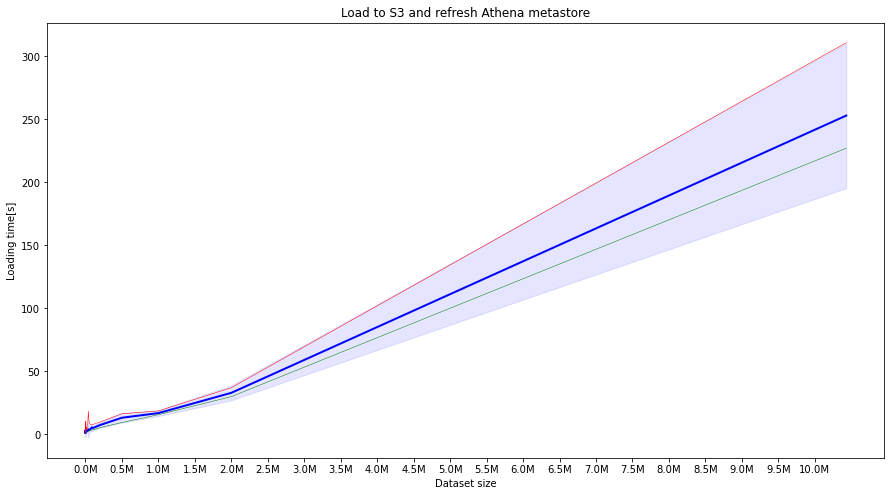

In [11]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_xlabel("Dataset size")
ax.set_ylabel("Loading time[s]")
xticks_range = range(0, 10000001, 500000)
plt.xticks(xticks_range, [str(round(x/1000000, 1)) + "M" for x in xticks_range])

plt.title("Load to S3 and refresh Athena metastore")
plt.plot(load_group[("duration", "mean")], linewidth=2, color="b")
plt.plot(load_group[("duration", "min")], linewidth=.5, color="g")
plt.plot(load_group[("duration", "max")], linewidth=.5, color="r")
plt.fill_between(load_group.index, 
                 load_group[("duration", "mean")] - 2*load_group[("duration", "std")],
                 load_group[("duration", "mean")] + 2*load_group[("duration", "std")],
                 color="b", alpha=.1)

In [12]:
athena_query["query"] = athena_query.apply(lambda x: x["query"].replace(x["original_sufix"], "sufix"), axis=1)

In [13]:
number_of_data = athena_query[athena_query["query"].str.startswith("SELECT COUNT(*)")][["Dataset", "dataset_sufix", "filename", "example_result"]]
number_of_data["data amount"] = (number_of_data["example_result"].fillna("0")
                                    .str.replace("[{'VarCharValue': '", "", regex=False)
                                    .str.replace("'}]", "", regex=False)
                                    .str.replace("{'VarCharValue': '", "", regex=False)
                                    .str.replace("'}", "", regex=False)
                                    .astype(int))
number_of_data.drop(["example_result"], axis=1, inplace=True)

In [14]:
athena_query = pd.merge(left=athena_query, right=number_of_data, on=["Dataset", "dataset_sufix", "filename"])
athena_query.drop(["filename", "example_result", "original_sufix"], axis=1, inplace=True)

In [15]:
athena_query = athena_query.set_index(["Dataset", "dataset_sufix"])
athena_query = athena_query.reset_index().set_index(["query", "Dataset", "dataset_sufix", "data amount"]).sort_index()
athena_query

Unnamed: 0  \
query                                              Dataset                dataset_sufix                          data amount               
SELECT * FROM "simm_poc"."simm_risk_data_eqderi... simm_risk_data_eqderiv snappy;['tabledate'];5                 20861674              0   
                                                                                                                 31292511              0   
                                                                                                                 41723348              0   
                                                                                                                 52154185              0   
                                                                                                                 62585022              0   
...                                                                                                                                  ...   
SELECT risktype, amount FROM "simm_poc"."simm_r... simm_risk_data_eqderiv snappy;['tabledate', 'atomicload'];805 16790500              2   
                                                                                                                 20148600              2   
                                                                                                                 23506700              2   
                                                                          snappy;['tabledate'];5                 73015859              2   
                                                                                                                 73015859              2   

                                                                                                                                duration  
query                                              Dataset                dataset_sufix                          data amount              
SELECT * FROM "simm_poc"."simm_risk_data_eqderi... simm_risk_data_eqderiv snappy;['tabledate'];5                 20861674     273.744764  
                                                                                                                 31292511     422.093767  
                                                                                                                 41723348     573.776228  
                                                                                                                 52154185     679.787974  
                                                                                                                 62585022     855.149695  
...                                                                                                                                  ...  
SELECT risktype, amount FROM "simm_poc"."simm_r... simm_risk_data_eqderiv snappy;['tabledate', 'atomicload'];805 16790500      27.598379  
                                                                                                                 20148600      32.563581  
                                                                                                                 23506700      37.041328  
                                                                          snappy;['tabledate'];5                 73015859      92.244517  
                                                                                                                 73015859      91.153651  

[62 rows x 2 columns]

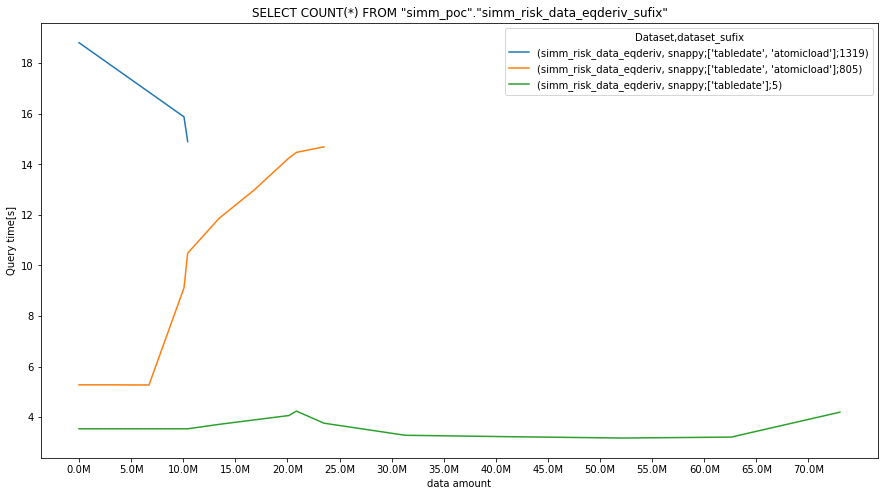

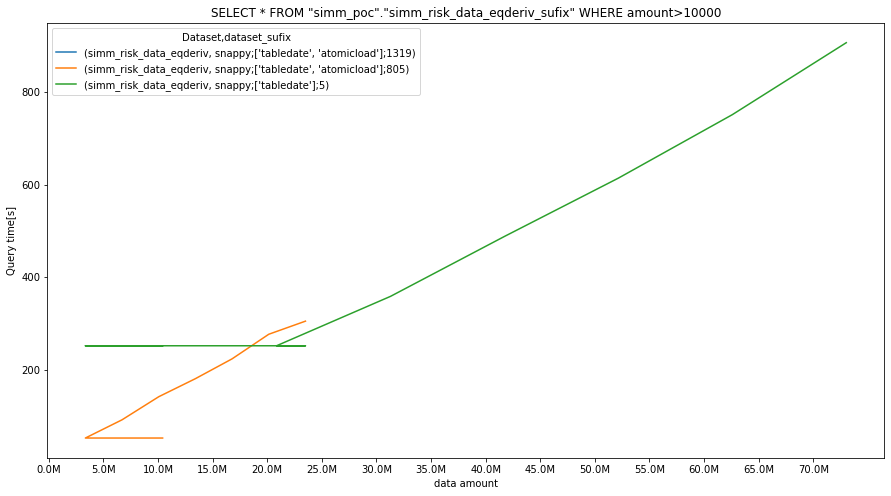

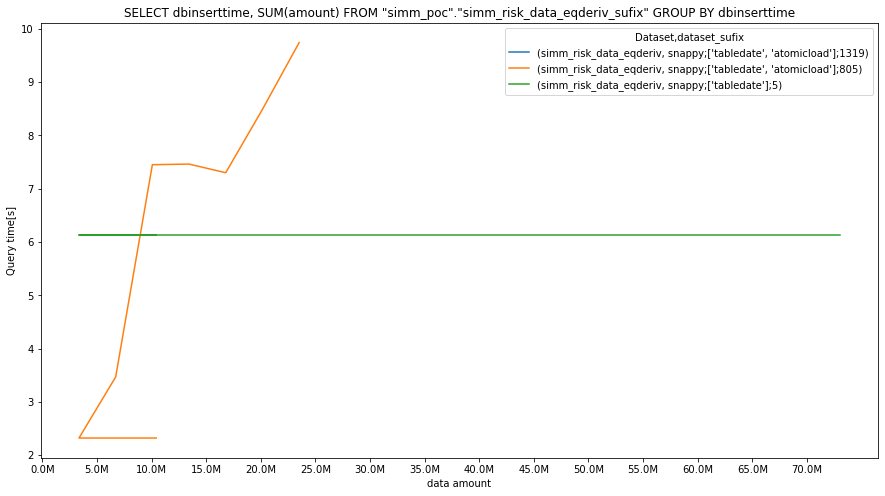

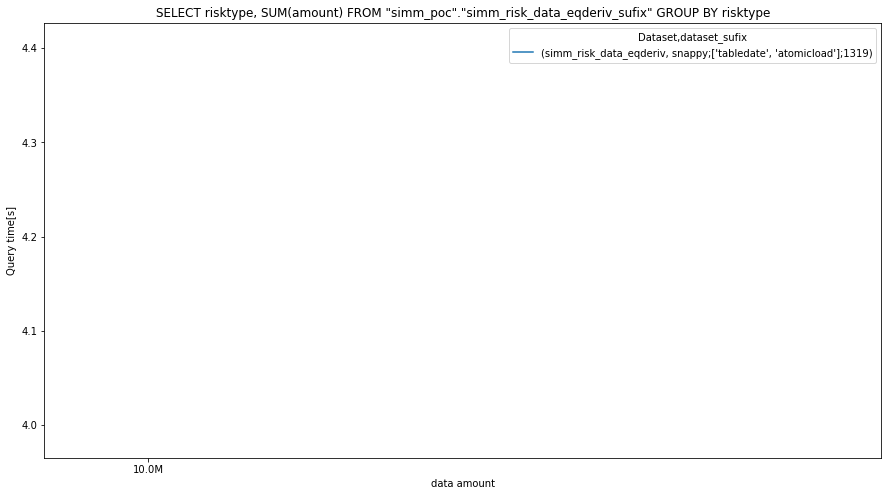

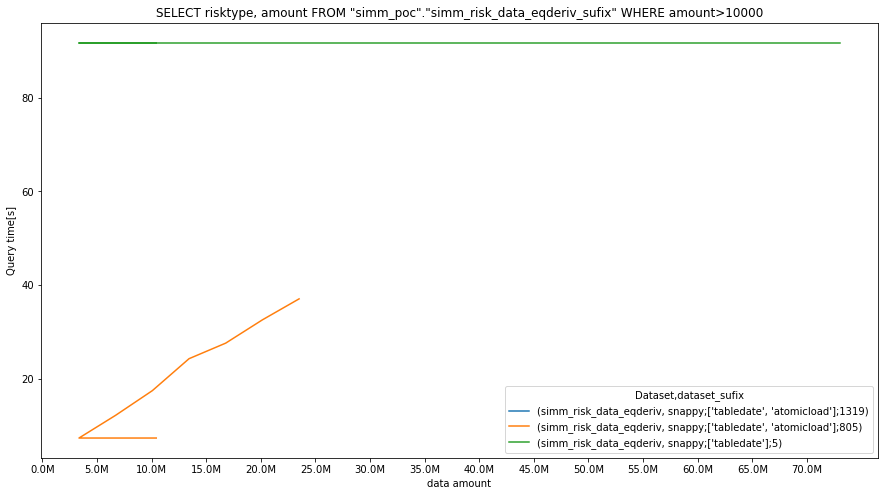

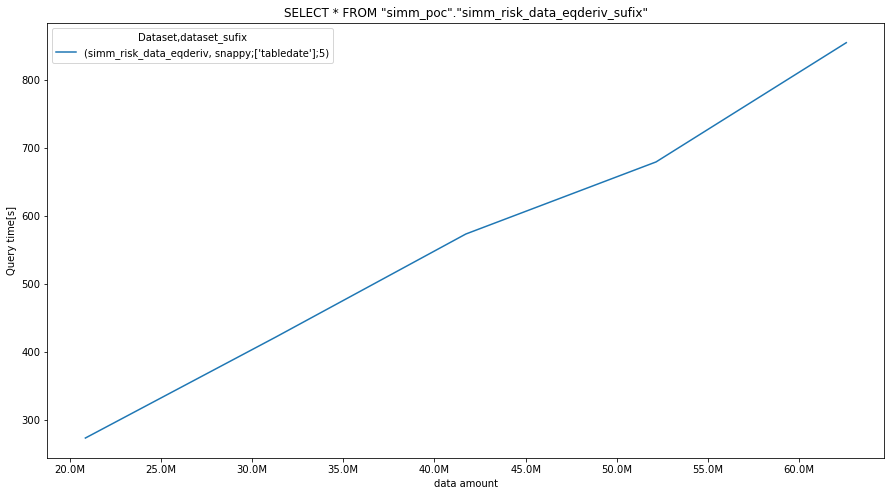

In [17]:
athena_query = athena_query.reset_index().groupby(["Dataset", "dataset_sufix", "data amount", "query"]).agg({"duration": "mean"})
athena_query = athena_query.reset_index().set_index(["Dataset", "dataset_sufix", "data amount"])
for query_type in athena_query["query"].unique():
    fig, ax = plt.subplots(figsize=(15, 8))
    ax.set_xlabel("Dataset size")
    ax.set_ylabel("Query time[s]")
    xticks_range = range(0, 70000001, 5000000)
    plt.xticks(xticks_range, [str(round(x/1000000, 1)) + "M" for x in xticks_range])
    plt.title(query_type)
    
    athena_query_filter = athena_query[athena_query["query"]==query_type]
    
    plot_data = athena_query_filter["duration"].unstack(level=[0, 1])
    plot_data.interpolate(inplace=True, limit_direction="backward")
    plot_data.plot(ax=ax)